# 02 KMEANS USARREST DATASET

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from pyclustertend import hopkins
from sklearn.preprocessing import scale
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics import silhouette_samples,silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning)


In [2]:
df = pd.read_csv("USArrests.csv",index_col=0)
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [4]:
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [5]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


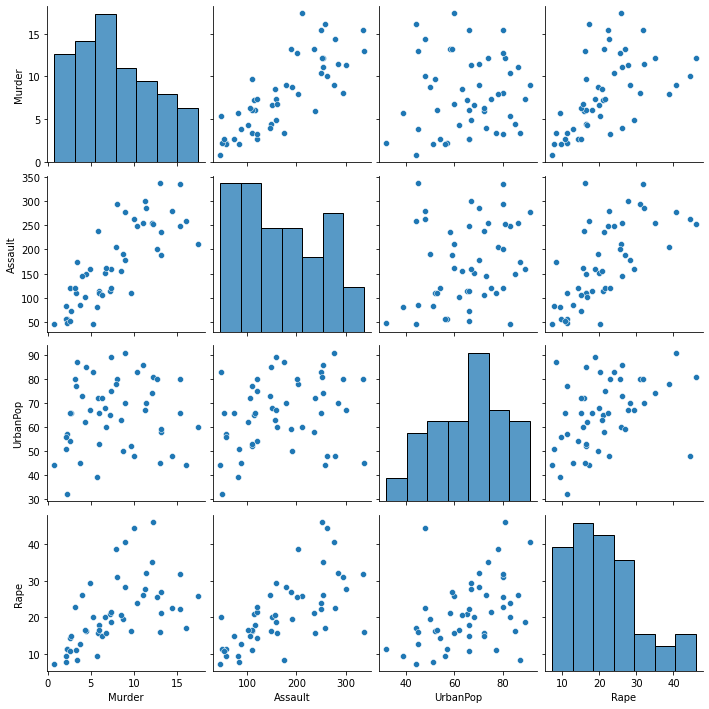

In [6]:
sns.pairplot(df)
plt.show();

## HOPKINS TEST

In [7]:
from pyclustertend import hopkins
from sklearn.preprocessing import scale

In [8]:
hopkins(df,df.shape[0])

0.41826237654660064

In [9]:
hopkins(scale(df),df.shape[0])

0.3721594035936082

# K_Means Model

In [10]:
k_means = KMeans(n_clusters = 2).fit(df)
clusters = k_means.labels_
clusters

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0])

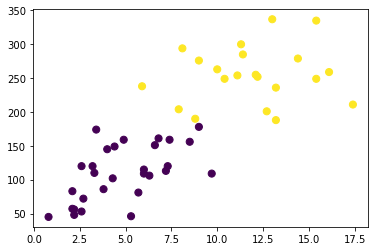

In [11]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = clusters, s = 50, cmap = "viridis");

In [12]:
centroids = k_means.cluster_centers_
centroids

array([[  4.84137931, 109.75862069,  64.03448276,  16.24827586],
       [ 11.85714286, 255.        ,  67.61904762,  28.11428571]])

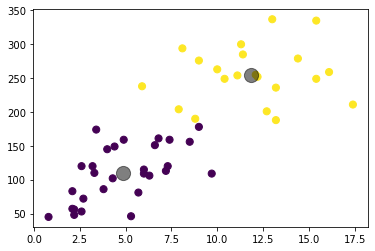

In [13]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = clusters, s = 50, cmap = "viridis")
plt.scatter(centroids[:,0], centroids[:,1], c = "black", s = 200, alpha=0.5);

## ELBOW METHOD

In [14]:
ssd = []
K = range(1,10)
for k in K:
    kmeans = KMeans(n_clusters = k).fit((df))
    ssd.append(kmeans.inertia_)
    

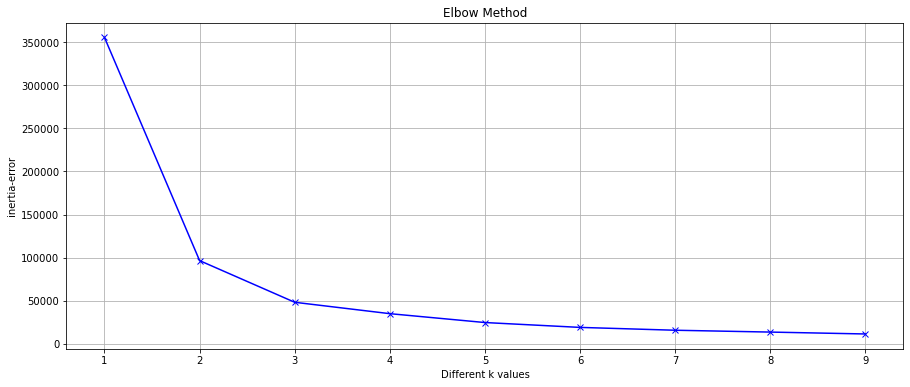

In [15]:
plt.figure(figsize=(15,6))
plt.plot(K, ssd, "bx-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error")
plt.title("Elbow Method")
plt.grid()
plt.show()

### Elbow Method with yellowbrick

In [16]:
from yellowbrick.cluster import KElbowVisualizer

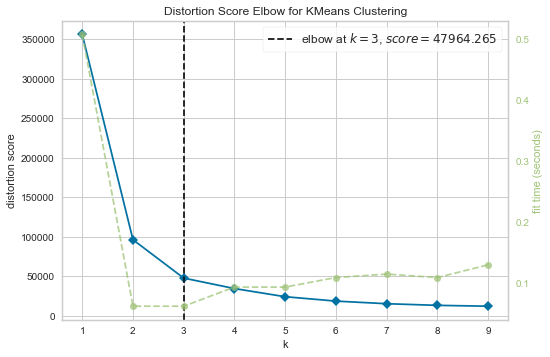

In [17]:
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (1,10))
visu.fit(df)
visu.poof();

In [18]:
kmeans = KMeans(n_clusters = 3).fit(df)
labels = kmeans.labels_

In [19]:
df["Cluster_Id"] = labels
df.sample(10)

,Murder,Assault,UrbanPop,Rape,Cluster_Id
West Virginia,5.7,81,39,9.3,1
New Jersey,7.4,159,89,18.8,2
Louisiana,15.4,249,66,22.2,0
North Dakota,0.8,45,44,7.3,1
Michigan,12.1,255,74,35.1,0
Kansas,6.0,115,66,18.0,1
Ohio,7.3,120,75,21.4,1
Connecticut,3.3,110,77,11.1,1
Indiana,7.2,113,65,21.0,1
Nebraska,4.3,102,62,16.5,1


# S(Silhouette) SCORE

In [20]:
from sklearn.metrics import silhouette_samples,silhouette_score

In [21]:
print(f'Silhouette Score(n=3): {silhouette_score(df, labels)}')

Silhouette Score(n=3): 0.5319947029251371


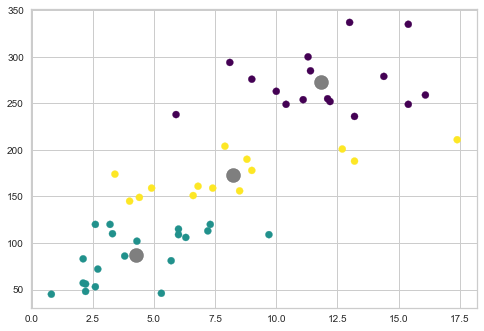

In [22]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = labels, s = 50, cmap = "viridis")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black',alpha=0.5, label = 'Centroids');

# ARI (Adjusted Rand Intex) SCORE

In [23]:
new_df = df.sample(20, random_state=42)
new_df

,Murder,Assault,UrbanPop,Rape,Cluster_Id
Indiana,7.2,113,65,21.0,1
South Carolina,14.4,279,48,22.5,0
New Mexico,11.4,285,70,32.1,0
Virginia,8.5,156,63,20.7,2
Louisiana,15.4,249,66,22.2,0
Wisconsin,2.6,53,66,10.8,1
Nebraska,4.3,102,62,16.5,1
Montana,6.0,109,53,16.4,1
North Carolina,13.0,337,45,16.1,0
Maryland,11.3,300,67,27.8,0


In [24]:
new_df["true_label"] = ['A','B','B','C','B','A','A','A','B','C','B','B','A','B','C','A','C','C','A','C']
new_df

,Murder,Assault,UrbanPop,Rape,Cluster_Id,true_label
Indiana,7.2,113,65,21.0,1,A
South Carolina,14.4,279,48,22.5,0,B
New Mexico,11.4,285,70,32.1,0,B
Virginia,8.5,156,63,20.7,2,C
Louisiana,15.4,249,66,22.2,0,B
Wisconsin,2.6,53,66,10.8,1,A
Nebraska,4.3,102,62,16.5,1,A
Montana,6.0,109,53,16.4,1,A
North Carolina,13.0,337,45,16.1,0,B
Maryland,11.3,300,67,27.8,0,C


In [25]:
from sklearn.metrics.cluster import adjusted_rand_score

In [26]:
adjusted_rand_score(new_df["true_label"],new_df["Cluster_Id"])

0.7188264058679706

In [27]:
pd.crosstab(new_df.Cluster_Id,new_df.true_label)

true_label,A,B,C
Cluster_Id,,,
0,0,7,1
1,7,0,1
2,0,0,4


## HIERARCHY CLUSTERING

In [29]:
# from scipy.cluster.hierarchy import linkage, dendrogram
# from sklearn.cluster import AgglomerativeClustering

In [30]:
hc_complete =  linkage(df,"complete")
hc_ward = linkage(df, "ward")
hc_single = linkage(df, "single")

### #COMPLETE

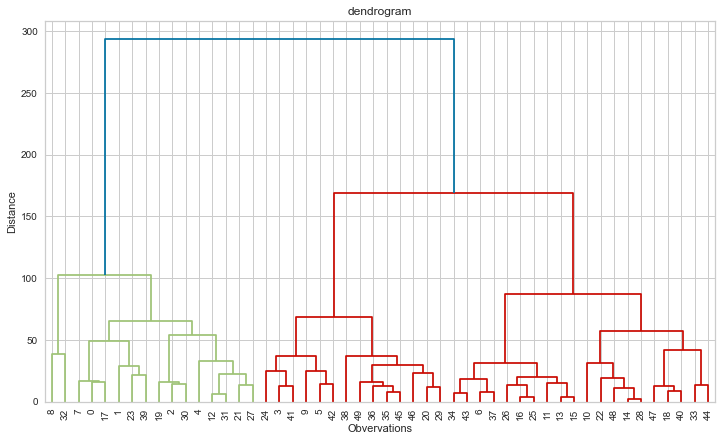

In [31]:
plt.figure(figsize = (12,7))
plt.title("dendrogram")
plt.xlabel("Obvervations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10);

### #WARD

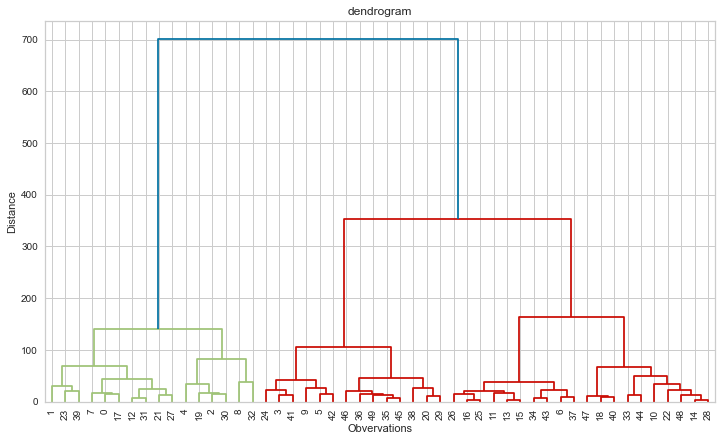

In [32]:
plt.figure(figsize = (12,7))
plt.title("dendrogram")
plt.xlabel("Obvervations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10);

### #SINGLE

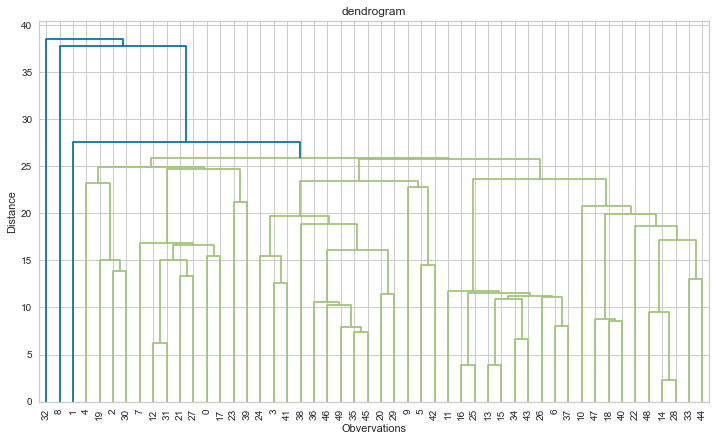

In [33]:
plt.figure(figsize = (12,7))
plt.title("dendrogram")
plt.xlabel("Obvervations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10);

In [34]:
hc = AgglomerativeClustering(n_clusters = 3,affinity='euclidean',linkage='ward') # burada default linkage='ward' dur.
hc.fit_predict(df)

array([1, 1, 1, 2, 1, 2, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 2, 1,
       0, 1, 2, 0, 0, 1, 0, 2, 1, 1, 1, 0, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0,
       0, 2, 2, 0, 0, 2], dtype=int64)

In [35]:
hc.labels_

array([1, 1, 1, 2, 1, 2, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 2, 1,
       0, 1, 2, 0, 0, 1, 0, 2, 1, 1, 1, 0, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0,
       0, 2, 2, 0, 0, 2], dtype=int64)

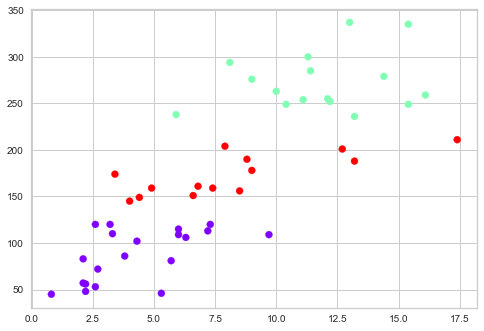

In [36]:
plt.scatter(df.iloc[:,0],df.iloc[:,1],c=hc.labels_,cmap="rainbow");

# S(Silhouette) SCORE

In [ ]:
# from sklearn.metrics import silhouette_samples,silhouette_score

In [37]:
print(f'Silhouette Score(n=3): {silhouette_score(df, hc.labels_)}')

Silhouette Score(n=3): 0.5319947029251371


### Visualization of Clusters in 3D

In [38]:
from mpl_toolkits.mplot3d import Axes3D

kmeans= KMeans(n_clusters=3).fit(df)
clusters= kmeans.labels_
centers = kmeans.cluster_centers_

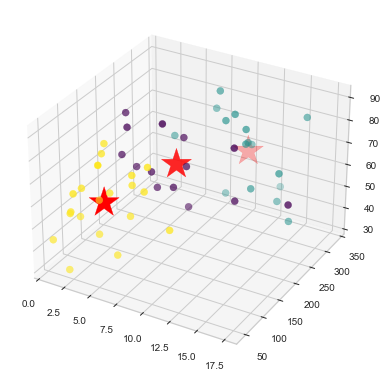

In [39]:
plt.rcParams["figure.figsize"] =(7,5)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df.iloc[:,0],df.iloc[:,1],df.iloc[:,2],c = clusters, s = 50,cmap = "viridis")
ax.scatter(centers[:,0],centers[:,1],centers[:,2],c="red",marker="*",s = 1000);

### Visualization of Clusters in Maps

In [40]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

In [41]:
df=df.reset_index().rename(columns={'index':'State'})
df['State_Short']=df['State'].replace(us_state_abbrev)
df.head()

,State,Murder,Assault,UrbanPop,Rape,Cluster_Id,State_Short
0,Alabama,13.2,236,58,21.2,0,AL
1,Alaska,10.0,263,48,44.5,0,AK
2,Arizona,8.1,294,80,31.0,0,AZ
3,Arkansas,8.8,190,50,19.5,2,AR
4,California,9.0,276,91,40.6,0,CA


In [42]:
df['Cluster_Id']=df['Cluster_Id'].astype('str')

In [44]:
import plotly.express as px  

fig = px.choropleth(df,  
                    locations='State_Short', 
                    color="Cluster_Id", 
                    hover_name="State", 
                    locationmode = 'USA-states') 
fig.update_layout(
    title_text = 'US States Crime Arrest Grouping', 
    geo_scope='usa',
)
fig.show()